# CSC 478: Assignment-1
# Brunda Chouthoy - 1804455
# Bank data

In [86]:
## Import modules
import numpy as np
import pandas as pd
## Set up matplotlib to work interactively.
import matplotlib.pyplot as plt
%matplotlib inline
import os 

In [87]:
os.getcwd()

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/Week2/ipynb'

In [88]:
os.chdir('/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/Week2/ipynb')

In [89]:
## Load text file via read_csv
bank_df = pd.read_csv("bank_data.csv", sep=',')
bank_df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


# 1. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [90]:
bank_df.describe(include="all")

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,600.000000,600.000000,600.000000,600,600,600,600,600,600,600,600
unique,600,NaN,NaN,NaN,2,4,2,2,2,2,2,2
top,ID12300,NaN,NaN,NaN,MALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,1,NaN,NaN,NaN,300,269,396,304,414,455,391,326
mean,NaN,42.395000,27524.031217,1.011667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,14.424947,12899.468246,1.056752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,5014.210000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,30.000000,17264.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,42.000000,24925.300000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,55.250000,36172.675000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So here we can see that the variables which have numeric values are Age, Income and Children, rest are all categorical variables. It can also be seen that there are no missing values for any of the variables.

In [91]:
#Get columns and values
bank_df.columns


Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [92]:
bank_df.values

array([['ID12101', 48, 17546.0, ..., 'NO', 'NO', 'YES'],
       ['ID12102', 40, 30085.1, ..., 'YES', 'YES', 'NO'],
       ['ID12103', 51, 16575.4, ..., 'YES', 'NO', 'NO'],
       ..., 
       ['ID12698', 31, 15976.3, ..., 'NO', 'NO', 'YES'],
       ['ID12699', 29, 14711.8, ..., 'NO', 'YES', 'NO'],
       ['ID12700', 38, 26671.6, ..., 'YES', 'YES', 'YES']], dtype=object)

In [93]:
## Get column dtypes
bank_df.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [94]:
#Mean age,income and children
bank_avg = bank_df[["age","income","children"]].mean()
bank_avg

age            42.395000
income      27524.031217
children        1.011667
dtype: float64

In [95]:
#Std - Deviations for the age, income and children attributes
bank_std = bank_df[["age","income","children"]].std()
bank_std

age            14.424947
income      12899.468246
children        1.056752
dtype: float64

In [96]:
#Descriptive statistics for the three numerical variables
bank_df[["age","income","children"]].describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [97]:
#Correlation table
bank_df.corr()

,age,income,children
age,1.000000,0.752726,0.023572
income,0.752726,1.000000,0.036761
children,0.023572,0.036761,1.000000


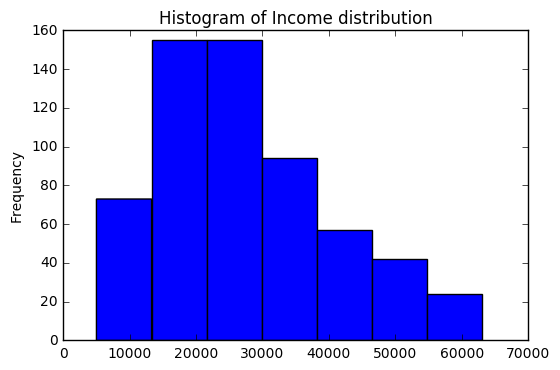

In [98]:
bank_df["income"].plot(kind='hist',bins=7, title="Histogram of Income distribution")
##So we can see that most of the bank customers have income less than 30,000 and results in a right skewed histogram.

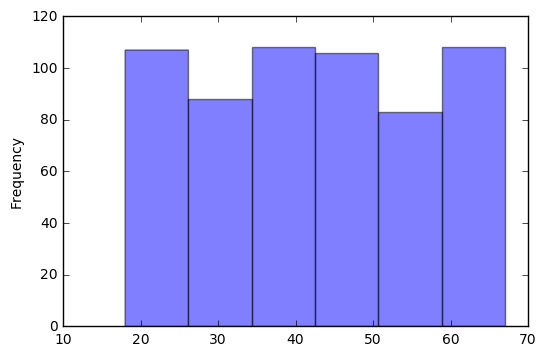

In [99]:
bank_df["age"].plot.hist(alpha=0.5, bins=6)

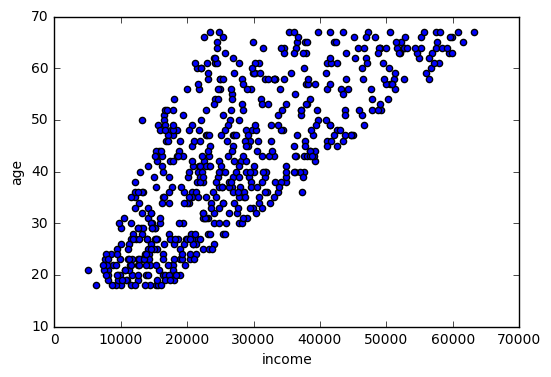

In [100]:
bank_df.plot(x='income', y='age', kind='scatter')

#From the scatterplot we can see the positive correlation, which was evident from the correlation table as well.

In [101]:
bank_df.groupby(["gender"]).mean()

,age,income,children
gender,,,
FEMALE,43.693333,27831.368233,1.026667
MALE,41.096667,27216.694200,0.996667


From the above table, we can see that the mean income of females is slightly higher than the mean income of males in this dataset. Also there is a difference of 2 years in the mean age of male and female and mean age of females is higher and so looking at the correlation between Age and Income, it supports the observation that income of females is higher than males.

In [102]:
print(bank_df.groupby(["region"]).mean())
print("\n")
print(bank_df.groupby(["married"]).mean())
print("\n")
print(bank_df.groupby(["car"]).mean())
print("\n")
print(bank_df.groupby(["savings_acct"]).mean())
print("\n")
print(bank_df.groupby(["current_acct"]).mean())
print("\n")
print(bank_df.groupby(["mortgage"]).mean())
print("\n")
print(bank_df.groupby(["pep"]).mean())
print("\n")

                  age        income  children
region                                       
INNER_CITY  41.992565  26843.999963  0.951673
RURAL       43.010417  30027.605417  1.229167
SUBURBAN    43.725806  28656.356935  0.967742
TOWN        42.202312  26786.349653  1.000000


               age        income  children
married                                   
NO       42.186275  27674.627108  1.083333
YES      42.502525  27446.451515  0.974747


           age        income  children
car                                   
NO   41.289474  26486.807336  0.973684
YES  43.530405  28589.288176  1.050676


                    age        income  children
savings_acct                                   
NO            38.430108  22405.999194  0.946237
YES           44.176329  29823.436908  1.041063


                    age        income  children
current_acct                                   
NO            43.296552  26802.195655  1.000000
YES           42.107692  27754.066725  1.015385


  

Inference from the tables:
REGION: We can see that customers from Inner City have least mean age and those from Suburban have the highest mean age, from which we can conclude the notion that younger people tend to live in Inner city where as older people are more in Suburban and Rural areas in this dataset. Also the mean income of the poeple living in Rural and Suburban regions is more as compared to mean income of customers from Inner city and Town.

CAR: We can see from the table that customers with car have higher mean age and income compared to those without cars.

SAVINGS account: We can see that people with more income are the ones who have savings account.
CURRENT account: We can see that age and income are almost same for the people with and without current accounts.

MORTGAGE: We can see that age and income are almost same for the people with and without mortgage.
PEP: We can see that customers who have purchased or enrolled into PEP are the ones with higher income and age as compared to those who does not have PEP.

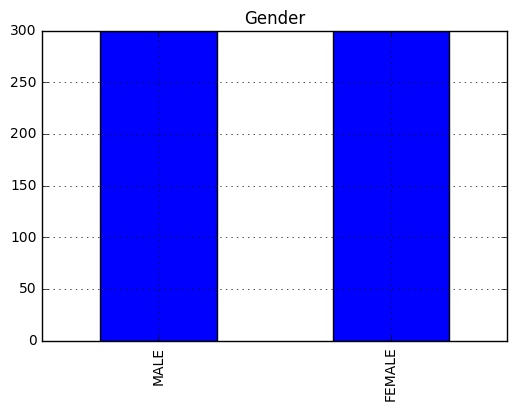

In [103]:
#Plotting distributions of categorical variables
bank_df["gender"].value_counts().plot.bar(grid= True, title="Gender")

#So we can see that there are equal number of Male and Female customers in this dataset

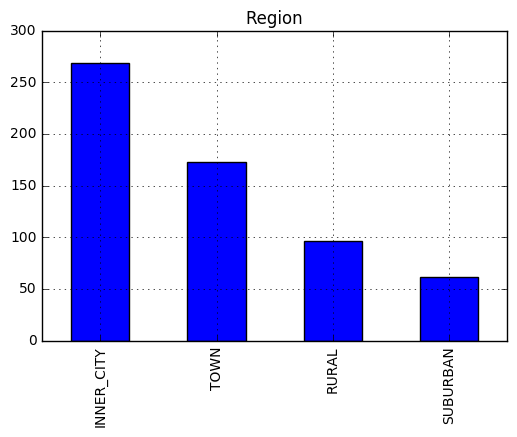

In [104]:
#Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
 #      'savings_acct', 'current_acct', 'mortgage', 'pep']

bank_df["region"].value_counts().plot.bar(grid= True, title="Region")
#So the bank customers are moslty from Inner_City and least number of customers are from Suburban region

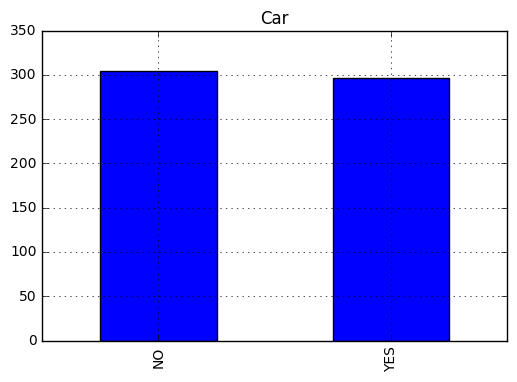

In [105]:
bank_df["car"].value_counts().plot.bar(grid= True, title="Car")

#More than half of the population in this bank data do not own a car

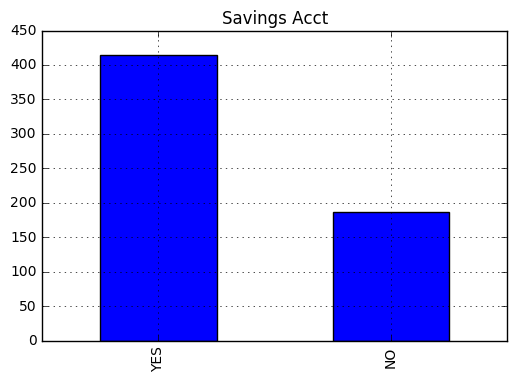

In [106]:
bank_df["savings_acct"].value_counts().plot.bar(grid= True, title="Savings Acct")
#Most of the people have a savings account

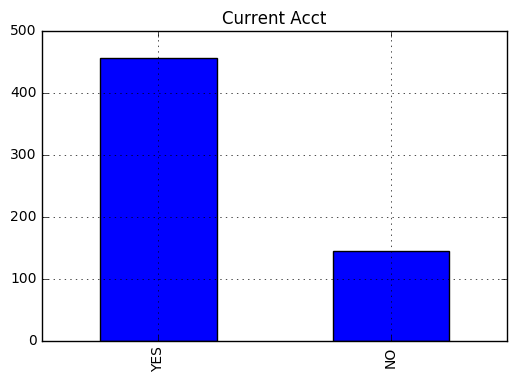

In [107]:
bank_df["current_acct"].value_counts().plot.bar(grid= True, title="Current Acct")
#Majority of the people have a current account

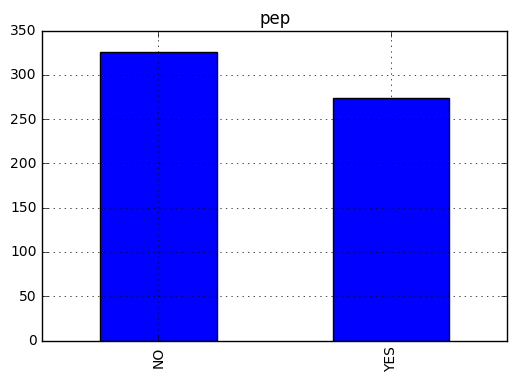

In [108]:
bank_df["pep"].value_counts().plot.bar(grid= True, title="pep")
#Aroud 275 customers have enrolled into the Personal Equity Plan

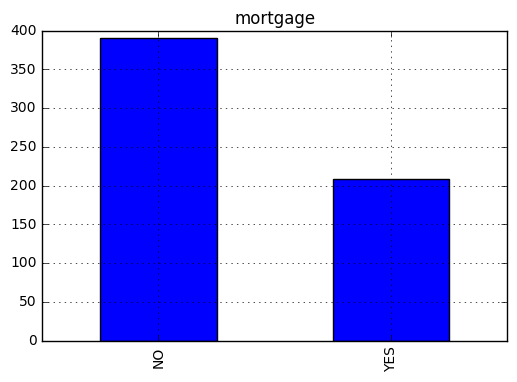

In [109]:
bank_df["mortgage"].value_counts().plot.bar(grid= True, title="mortgage")
#approximately 66% (almost 400 out of 600) of the customers in this data set does not have a mortgage

# 2. Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [110]:
bank_df.groupby("pep").mean()

,age,income,children
pep,,,
NO,40.098160,24900.953374,1.067485
YES,45.127737,30644.919453,0.945255


In [111]:
bank_df.groupby("pep").describe()

age    children        income
pep                                            
NO  count  326.000000  326.000000    326.000000
    mean    40.098160    1.067485  24900.953374
    std     14.123506    1.195524  11661.123422
    min     18.000000    0.000000   5014.210000
    25%     27.000000    0.000000  15366.475000
    50%     40.000000    0.000000  23105.000000
    75%     51.000000    2.000000  31210.900000
    max     67.000000    3.000000  61554.600000
YES count  274.000000  274.000000    274.000000
    mean    45.127737    0.945255  30644.919453
    std     14.327991    0.860571  13609.613043
    min     18.000000    0.000000   7756.360000
    25%     34.000000    0.000000  19639.475000
    50%     45.000000    1.000000  28080.050000
    75%     58.000000    1.000000  38458.350000
    max     67.000000    3.000000  63130.100000

So here we can see that the customers who usually buy PEP, have higher mean age and so we can say that older people are usually the one who are buying PEP.
Also those with more mean income are the one who are buying Personal Equity Plans.

In [112]:
bank_df.groupby(["pep","gender"])["gender"].count()

pep  gender
NO   FEMALE    170
     MALE      156
YES  FEMALE    130
     MALE      144
Name: gender, dtype: int64

In [113]:
tab1 = pd.crosstab(bank_df["pep"],bank_df["gender"])
tab1

gender,FEMALE,MALE
pep,,
NO,170,156
YES,130,144


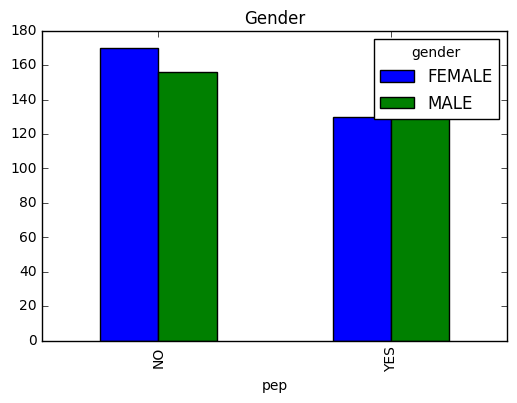

In [114]:
tab1.plot.bar(title="Gender")

In [115]:
bank_df.groupby(["pep","region"])["region"].count()

pep  region    
NO   INNER_CITY    146
     RURAL          50
     SUBURBAN       28
     TOWN          102
YES  INNER_CITY    123
     RURAL          46
     SUBURBAN       34
     TOWN           71
Name: region, dtype: int64

In [116]:
tab2 = pd.crosstab(bank_df["pep"],bank_df["region"])
tab2

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pep,,,,
NO,146,50,28,102
YES,123,46,34,71


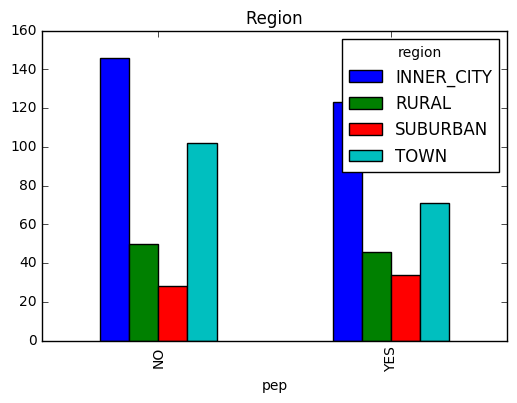

In [117]:
tab2.plot.bar(title="Region")

In [118]:
bank_df.groupby(["pep","married"])["married"].count()

pep  married
NO   NO          84
     YES        242
YES  NO         120
     YES        154
Name: married, dtype: int64

In [119]:
tab2 = pd.crosstab(bank_df["pep"], bank_df["married"])
tab2

married,NO,YES
pep,,
NO,84,242
YES,120,154


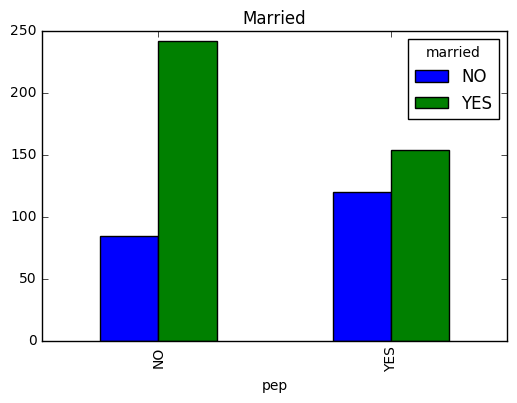

In [120]:
tab2.plot.bar(title="Married")

In [121]:
bank_df.groupby(["pep","car"])["car"].count()

pep  car
NO   NO     168
     YES    158
YES  NO     136
     YES    138
Name: car, dtype: int64

In [122]:
tab3 = pd.crosstab(bank_df["pep"], bank_df["car"])
tab3

car,NO,YES
pep,,
NO,168,158
YES,136,138


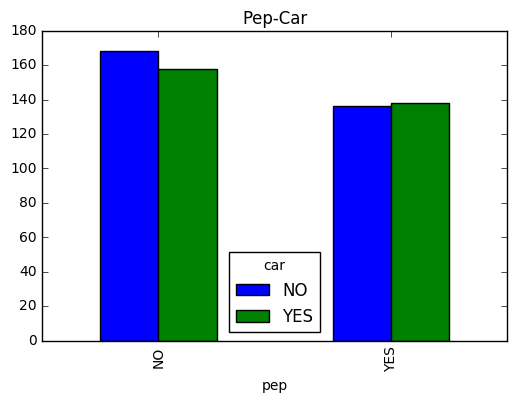

In [123]:
tab3.plot.bar(title="Pep-Car")

In [124]:
bank_df.groupby(["pep","mortgage"])["mortgage"].count()

pep  mortgage
NO   NO          209
     YES         117
YES  NO          182
     YES          92
Name: mortgage, dtype: int64

In [125]:
tab4 = pd.crosstab(bank_df["pep"], bank_df["mortgage"])
tab4

mortgage,NO,YES
pep,,
NO,209,117
YES,182,92


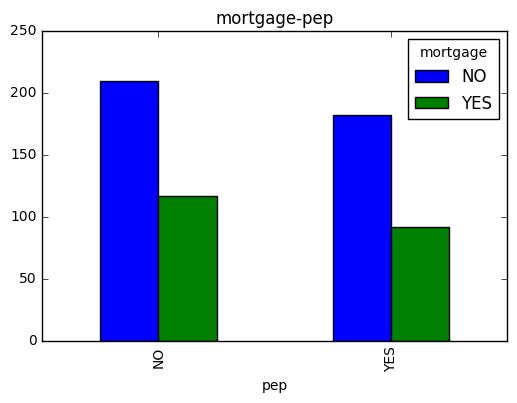

In [126]:
tab4.plot.bar(title="mortgage-pep")

In [127]:
bank_df.groupby(["pep","savings_acct"])["savings_acct"].count()

pep  savings_acct
NO   NO               91
     YES             235
YES  NO               95
     YES             179
Name: savings_acct, dtype: int64

In [128]:
tab5=pd.crosstab(bank_df["pep"],bank_df["savings_acct"])
tab5

savings_acct,NO,YES
pep,,
NO,91,235
YES,95,179


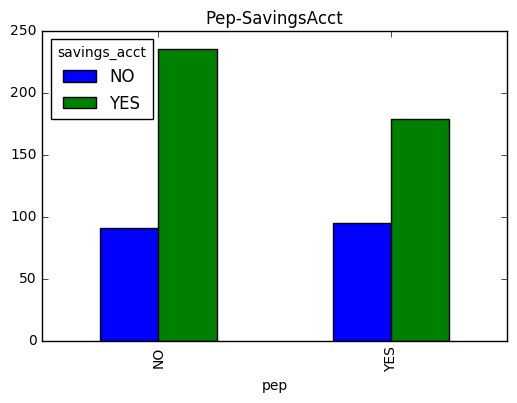

In [129]:
tab5.plot.bar(title="Pep-SavingsAcct")

In [130]:
bank_df.groupby(["pep","current_acct"])["current_acct"].count()

pep  current_acct
NO   NO               82
     YES             244
YES  NO               63
     YES             211
Name: current_acct, dtype: int64

In [131]:
tab6 = pd.crosstab(bank_df["pep"],bank_df["current_acct"])
tab6

current_acct,NO,YES
pep,,
NO,82,244
YES,63,211


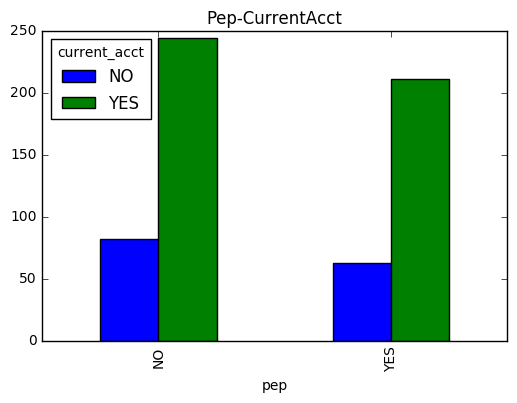

In [132]:
tab6.plot.bar(title="Pep-CurrentAcct")

It can be seen that the customers who usually buy PEP, have higher mean age and so we can say that older people are usually the one who are buying PEP. Also those with more mean income are the one who are buying Personal Equity Plans.
In this given dataset, it can be inferred that people with older people with higher income are mostly buying PEPs.

From the above analysis, we can see the aggregated counts of regions for PEP values. Also there is cross table showing 2 x 4 (pep x region) table with entries representing the counts. There is also a bar graph which visualized the crosstab and we can see that only for the suburban region the trend is different and there are more people with PEP value of YES where as for all the other regions there are more counts for PEP as NO. Similarly, the variable "Pep" is compared and evaluated against all the other variables and results are displayed.

# 3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [133]:
income_z = (bank_df["income"] - bank_df["income"].mean())/bank_df["income"].std()
income_z.head()


0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
Name: income, dtype: float64

In [134]:
#A new variable "income_z" having standardized values of the income attribute converted using z-score normalization
print(income_z)

0     -0.773523
1      0.198541
2     -0.848766
3     -0.554180
4      1.787071
5      0.802015
6     -1.445560
7     -0.199809
8     -0.172079
9     -0.256749
10     2.502419
11    -0.067075
12    -0.913854
13     2.145877
14    -0.624013
15    -0.401717
16    -0.759274
17     1.045932
18    -0.047663
19    -0.387708
20     2.353327
21    -0.854821
22     0.846746
23    -0.929126
24    -1.153825
25     1.047328
26    -0.520512
27    -0.574445
28     0.142259
29    -0.252253
         ...   
570    0.476102
571    0.669963
572    0.014642
573   -0.397174
574    0.073326
575    0.229774
576   -0.648378
577    1.381334
578   -1.645790
579   -0.185770
580    1.888083
581   -1.153469
582   -0.429446
583    0.121638
584   -0.309752
585   -1.395958
586   -0.710039
587    0.290692
588    1.717092
589   -1.155135
590   -0.287255
591    0.306204
592   -0.562506
593    1.852244
594    0.267280
595    1.511765
596   -1.383916
597   -0.895210
598   -0.993237
599   -0.066083
Name: income, dtype: flo

# 4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [135]:
bank_df["age"].head()

0    48
1    40
2    51
3    23
4    57
Name: age, dtype: int64

In [136]:
#Using the pandas qcut method on the age attribute
age_bins = pd.qcut(bank_df["age"],[0, .33, .66, 1],labels=["young","mid-age","old"],retbins = True)     
age_bins

(0      mid-age
 1      mid-age
 2          old
 3        young
 4          old
 5          old
 6        young
 7          old
 8      mid-age
 9          old
 10         old
 11         old
 12     mid-age
 13         old
 14     mid-age
 15     mid-age
 16     mid-age
 17     mid-age
 18         old
 19       young
 20         old
 21         old
 22         old
 23       young
 24       young
 25         old
 26     mid-age
 27     mid-age
 28     mid-age
 29         old
         ...   
 570    mid-age
 571    mid-age
 572      young
 573    mid-age
 574    mid-age
 575    mid-age
 576      young
 577        old
 578      young
 579    mid-age
 580        old
 581      young
 582    mid-age
 583    mid-age
 584      young
 585      young
 586      young
 587    mid-age
 588        old
 589      young
 590      young
 591    mid-age
 592    mid-age
 593        old
 594        old
 595        old
 596      young
 597      young
 598      young
 599    mid-age
 Name: age, dtype: categ

# 5. Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.

In [137]:
bank_df.head()


,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [138]:
cols = ["age","income","children"]
bank_df[cols] = bank_df[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [139]:
bank_df.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


We can see from the table that the values of age, income and children are transformed and applying Min-Max normalization we have all values between 0.0 and 1.0, which we can verify using min and max methods for all 3 variables.

In [140]:
print("Min age:",bank_df["age"].min())
print("Max age:",bank_df["age"].max())
print("Min income:",bank_df["income"].min())
print("Max income:",bank_df["income"].max())
print("Min children:",bank_df["children"].min())
print("Max children:",bank_df["children"].max())

Min age: 0.0
Max age: 1.0
Min income: 0.0
Max income: 1.0
Min children: 0.0
Max children: 1.0


# 6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submitit along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [141]:
bank_df_ssf = pd.get_dummies(bank_df, columns = ["gender","region","married","car","savings_acct","current_acct","mortgage"])
bank_df_ssf.head()

,id,age,income,children,pep,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,...,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,ID12101,0.612245,0.215634,0.333333,YES,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,ID12102,0.448980,0.431395,1.000000,NO,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,ID12103,0.673469,0.198933,0.000000,NO,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,ID12104,0.102041,0.264320,1.000000,NO,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,ID12105,0.795918,0.783987,0.000000,NO,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [142]:
#Saving dataframe to bank_numeric.csv
bank_df_ssf.to_csv("bank_numeric.csv", float_format="%1.4f")

So we have converted the data into numeric format with normalized Age, Income and Children and dummy vairbales for Gender, Region, Married, Car, Savings Account, Current Account, Mortgage and PEP. Though ID field has data type "obj" so by default if we do pd.get_dummies(data) that would convert ID to numeric as well which we do not want so I have specified columns in pd.get_dummies(). Have attached the CSV file "Bank_Data_Numeric.csv" in the submission.

# 7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can do this by using the corr() function in Pandas or corrcoef function in NumPy].

In [145]:
bank_df_ssf = bank_df_ssf.drop("id",1)
#Removing the customerID column before creating the correlation matrix

In [146]:
bank_df_ssf.head()

,age,income,children,pep,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,0.612245,0.215634,0.333333,YES,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.448980,0.431395,1.000000,NO,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.673469,0.198933,0.000000,NO,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.102041,0.264320,1.000000,NO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.795918,0.783987,0.000000,NO,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [147]:
bank_df_ssf.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,0.010394,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,-0.008386,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,-0.048716,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,-0.021110,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,0.021110,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,0.003254,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,-0.022649,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,0.012483,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,0.006369,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,-1.000000,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711


From the correlation table above, we can see that there is positive correlation between Age and Income and the correlation coefficient comes out to be 0.75. No other correlation coefficients show that strong positive or negative correlation as seen from the table. There is correlation between variables like PEP (YES/NO) and Income and Age and Savings Account (YES/NO) and Income and Age but the correlation coefficients are very small with values less than 0.3 and correlation of around -0.39 between dummies like Region_Rural and Region_InnerCity and negative correlation of -0.5 between Region_Town and Region_InnerCity which explain the observations we made before that those regions differ from each other, but it doesn't provide any valuable insights or analysis so we the only significant correlation we can see from the table is between Age and Income. Also there are very weak positive correaltions between Age and Income and SavingsAccount_Yes and PEP_Yes which supports the claim we made earlier that people with higher income and age are the ones who have savings accounts and are enrolled into PEP.

# 8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

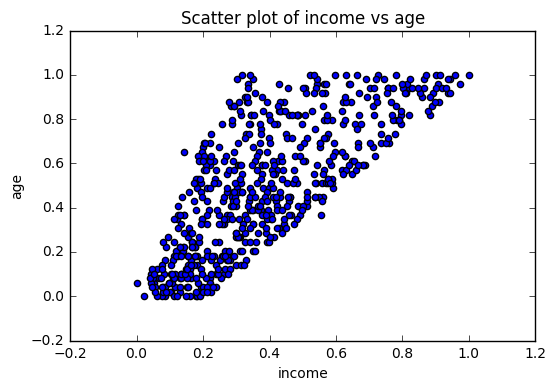

In [149]:
bank_df.plot(x='income', y='age', kind='scatter', title="Scatter plot of income vs age")

From the scatterplot we can see the moderately strong positive correlation, which was evident from the correlation table as well. X-axis has "Income" label and Y-Axis has "Age" label.

# 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

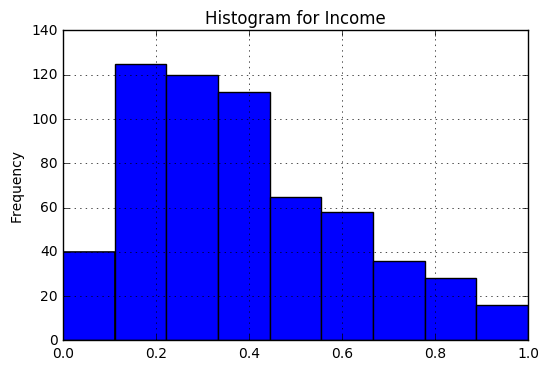

In [161]:
bank_df["income"].plot(x="income",bins=9, kind="hist", title="Histogram for Income",grid=True)

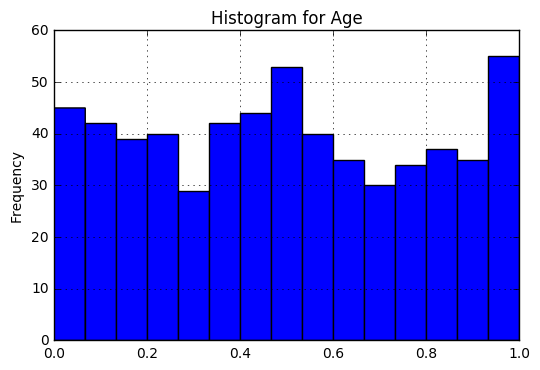

In [158]:
bank_df["age"].plot(x="age", bins=15, kind="hist", title="Histogram for Age", grid=True)

# 10. Using a bargraph, plot the distribution of the values of the region attribute.

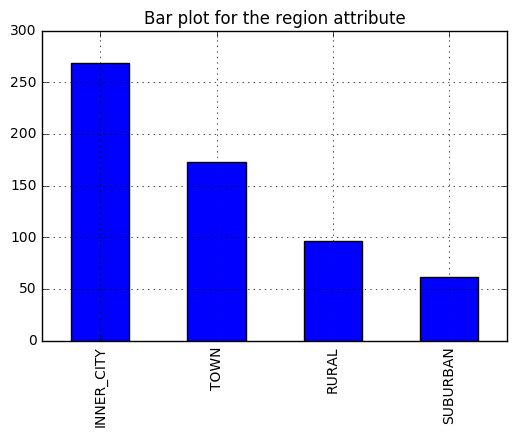

In [168]:
bank_df["region"].value_counts().plot(kind="bar",title="Bar plot for the region attribute", grid=True)

From the Bar plot, it can be inferred that the highest number of customers are from INNER_CITY in this dataset and the least count is of SUBURBAN region.

# 11. Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [172]:
bank_df.groupby(["region","pep"])["pep"].count()

region      pep
INNER_CITY  NO     146
            YES    123
RURAL       NO      50
            YES     46
SUBURBAN    NO      28
            YES     34
TOWN        NO     102
            YES     71
Name: pep, dtype: int64

In [174]:
tab= pd.crosstab(bank_df["region"],bank_df["pep"])
tab

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


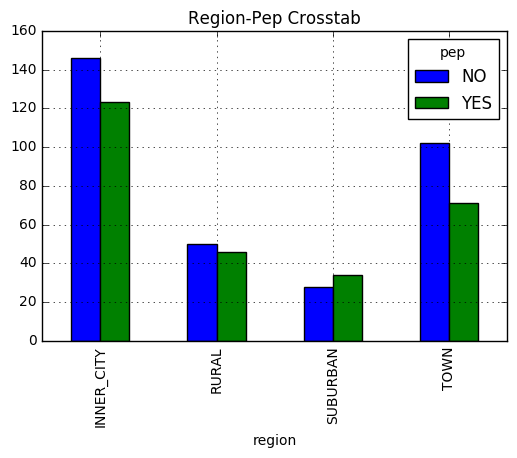

In [178]:
tab.plot(legend=True,grid=True, kind="bar",title="Region-Pep Crosstab")

From the above analysis, we can see the aggregated counts of regions for PEP values. Also there is crosstab showing 4 x 2 (region x pep) table with entries representing the counts.The bar graph visualizes the crosstab and we can see that only for the suburban region the trend is different and there are more people with PEP value of YES where as for all the other regions there are more counts for PEP as NO.